In [127]:

def extract_filename(path):
    """
    Extracts the filename without extension from a given file path.

    Parameters:
    path (str): The file path from which to extract the filename.

    Returns:
    str: The filename without its extension.
    """
    import os
    # Extract the base name of the file (e.g., 'AZ_Glendale.txt')
    base_name = os.path.basename(path)
    # Split the base name by '.' and return the first part (e.g., 'AZ_Glendale')
    return os.path.splitext(base_name)[0]


In [128]:
import pandas as pd

# Load the Excel file
excel_path = r"C:\Users\clint\Desktop\NZLUD_Checker\august 12\combined_aug7.xlsx"
excel_df = pd.read_excel(excel_path)

# Load the CSV file
csv_path = r"C:\Users\clint\Desktop\NZLUD_Checker\old\Wills_R_nzlud\nzlud_muni.csv"
csv_df = pd.read_csv(csv_path, encoding='latin1')



# Assuming df is your DataFrame and extract_filename is already defined
# Apply the extract_filename function to the 'muni' column
excel_df['muni'] = excel_df['muni'].apply(extract_filename)

# If you want to store the result in a new column, you can do:
# df['muni_extracted'] = df['muni'].apply(extract_filename)
excel_df

,muni,restrict_NA_permit,restrict_NA_units,limit_NA_dwellings,limit_NA_dwelling_units
0,AZ_Glendale,0,0,0,0
1,AZ_SanLuis,0,0,0,0
2,CA_Belmont,0,0,0,0
3,CA_Coronado,0,0,0,0
4,CA_Dublin,0,0,0,0
...,...,...,...,...,...
2634,VT_Winooski,0,0,0,0
2635,WA_Milton,0,0,0,0
2636,WA_Washougal,1,1,0,0
2637,WI_Kiel,0,0,0,0


In [129]:
excel_df_sorted = excel_df.sort_values('muni')
excel_df_sorted

,muni,restrict_NA_permit,restrict_NA_units,limit_NA_dwellings,limit_NA_dwelling_units
1696,AK_Anchorage,0,0,0,0
1073,AK_Homer,0,0,0,0
328,AK_Kenai,0,0,0,0
766,AK_Palmer,0,0,0,0
1721,AK_Petersburg,0,0,0,0
...,...,...,...,...,...
1578,WY_Douglas,0,0,0,0
375,WY_Jackson,0,0,0,0
765,WY_Lander,0,0,0,0
1326,WY_Laramie,0,0,0,0


In [130]:
csv_df = csv_df.iloc[:, :3]

csv_df = csv_df.sort_values(by=['statename', 'place'])
csv_df

,GEOID,statename,place
34,203000,AK,Anchorage
35,233140,AK,Homer
36,238420,AK,Kenai
37,258660,AK,Palmer
38,260310,AK,Petersburg
...,...,...,...
2634,5621125,WY,Douglas
2635,5640120,WY,Jackson
2636,5644760,WY,Lander
2637,5645050,WY,Laramie


In [131]:
csv_df = csv_df.reset_index(drop=True)
excel_df_sorted = excel_df_sorted.reset_index(drop=True)
csv_df

,GEOID,statename,place
0,203000,AK,Anchorage
1,233140,AK,Homer
2,238420,AK,Kenai
3,258660,AK,Palmer
4,260310,AK,Petersburg
...,...,...,...
2634,5621125,WY,Douglas
2635,5640120,WY,Jackson
2636,5644760,WY,Lander
2637,5645050,WY,Laramie


In [132]:
excel_df_sorted

,muni,restrict_NA_permit,restrict_NA_units,limit_NA_dwellings,limit_NA_dwelling_units
0,AK_Anchorage,0,0,0,0
1,AK_Homer,0,0,0,0
2,AK_Kenai,0,0,0,0
3,AK_Palmer,0,0,0,0
4,AK_Petersburg,0,0,0,0
...,...,...,...,...,...
2634,WY_Douglas,0,0,0,0
2635,WY_Jackson,0,0,0,0
2636,WY_Lander,0,0,0,0
2637,WY_Laramie,0,0,0,0


In [133]:
combined_df = pd.concat([csv_df, excel_df_sorted], axis=1)
combined_df

,GEOID,statename,place,muni,restrict_NA_permit,restrict_NA_units,limit_NA_dwellings,limit_NA_dwelling_units
0,203000,AK,Anchorage,AK_Anchorage,0,0,0,0
1,233140,AK,Homer,AK_Homer,0,0,0,0
2,238420,AK,Kenai,AK_Kenai,0,0,0,0
3,258660,AK,Palmer,AK_Palmer,0,0,0,0
4,260310,AK,Petersburg,AK_Petersburg,0,0,0,0
...,...,...,...,...,...,...,...,...
2634,5621125,WY,Douglas,WY_Douglas,0,0,0,0
2635,5640120,WY,Jackson,WY_Jackson,0,0,0,0
2636,5644760,WY,Lander,WY_Lander,0,0,0,0
2637,5645050,WY,Laramie,WY_Laramie,0,0,0,0


In [134]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import pandas as pd

# List of paths to compressed shapefiles
compressed_shapefile_paths = [
    f'C:\\Users\\clint\\Desktop\\NZLUD_Checker\\FIPS\\tl_2010_{str(i).zfill(2)}_place10.zip'
    for i in range(1, 79)
]

# Initialize an empty list to store GeoDataFrames
gdfs = []

# Loop through each compressed file path, try to read the shapefile, and append the GeoDataFrame to the list if successful
for path in compressed_shapefile_paths:
    try:
        if os.path.exists(path):
            gdf = gpd.read_file(f"zip://{path}")
            gdfs.append(gdf)
        else:
            print(f"File not found: {path}")
    except Exception as e:
        print(f"Error reading {path}: {e}")

# Concatenate all GeoDataFrames into a single GeoDataFrame
combined_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))
combined_gdf


File not found: C:\Users\clint\Desktop\NZLUD_Checker\FIPS\tl_2010_03_place10.zip
File not found: C:\Users\clint\Desktop\NZLUD_Checker\FIPS\tl_2010_07_place10.zip
File not found: C:\Users\clint\Desktop\NZLUD_Checker\FIPS\tl_2010_14_place10.zip
File not found: C:\Users\clint\Desktop\NZLUD_Checker\FIPS\tl_2010_43_place10.zip
File not found: C:\Users\clint\Desktop\NZLUD_Checker\FIPS\tl_2010_52_place10.zip
File not found: C:\Users\clint\Desktop\NZLUD_Checker\FIPS\tl_2010_57_place10.zip
File not found: C:\Users\clint\Desktop\NZLUD_Checker\FIPS\tl_2010_58_place10.zip
File not found: C:\Users\clint\Desktop\NZLUD_Checker\FIPS\tl_2010_59_place10.zip
File not found: C:\Users\clint\Desktop\NZLUD_Checker\FIPS\tl_2010_61_place10.zip
File not found: C:\Users\clint\Desktop\NZLUD_Checker\FIPS\tl_2010_62_place10.zip
File not found: C:\Users\clint\Desktop\NZLUD_Checker\FIPS\tl_2010_63_place10.zip
File not found: C:\Users\clint\Desktop\NZLUD_Checker\FIPS\tl_2010_64_place10.zip
File not found: C:\Users\cli

,STATEFP10,PLACEFP10,PLACENS10,GEOID10,NAME10,NAMELSAD10,LSAD10,CLASSFP10,PCICBSA10,PCINECTA10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,01,80376,02406847,0180376,Webb,Webb town,43,C1,N,N,G4110,A,29526113,0,+31.2576050,-085.2893794,"POLYGON ((-85.25542 31.2698, -85.25556 31.2612..."
1,01,64152,02407196,0164152,Rehobeth,Rehobeth town,43,C1,N,N,G4110,A,19635705,80600,+31.1245953,-085.4397997,"MULTIPOLYGON (((-85.41918 31.16249, -85.41884 ..."
2,01,45904,02406075,0145904,Madrid,Madrid town,43,C1,N,N,G4110,A,5025806,0,+31.0357714,-085.3978454,"POLYGON ((-85.38144 31.03881, -85.38145 31.037..."
3,01,40072,02405953,0140072,Kinsey,Kinsey town,43,C1,N,N,G4110,A,31343903,0,+31.2926618,-085.3354729,"POLYGON ((-85.31545 31.31243, -85.30191 31.311..."
4,01,44344,02406049,0144344,Louisville,Louisville town,43,C1,N,N,G4110,A,7118467,0,+31.7810467,-085.5583357,"POLYGON ((-85.55096 31.80421, -85.55074 31.804..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29788,78,27000,02651573,7827000,Coral Bay,Coral Bay CDP,57,U1,N,N,G4210,S,4756991,975009,+18.3451921,-064.7172889,"POLYGON ((-64.70794 18.3467, -64.70803 18.3465..."
29789,78,18100,02414007,7818100,Charlotte Amalie East,Charlotte Amalie East CDP,57,U2,N,N,G4210,S,864051,0,+18.3339781,-064.9157258,"POLYGON ((-64.91468 18.33113, -64.91472 18.331..."
29790,78,19000,02414008,7819000,Charlotte Amalie West,Charlotte Amalie West CDP,57,U2,N,N,G4210,S,5113595,27768,+18.3368927,-064.9720696,"POLYGON ((-64.97124 18.34677, -64.96721 18.347..."
29791,78,65530,02651575,7865530,Red Hook,Red Hook CDP,57,U1,N,N,G4210,S,686129,716711,+18.3236115,-064.8462620,"POLYGON ((-64.8508 18.32866, -64.84968 18.3294..."


In [135]:


# Convert columns to string type
combined_df['GEOID'] = combined_df['GEOID'].astype(str)
combined_gdf['GEOID10'] = combined_gdf['GEOID10'].astype(str)

# Perform a left join on the correct column, including all columns from both DataFrames
result_df = pd.merge(combined_df, combined_gdf, left_on='GEOID', right_on='GEOID10', how='left')
result_df

,GEOID,statename,place,muni,restrict_NA_permit,restrict_NA_units,limit_NA_dwellings,limit_NA_dwelling_units,STATEFP10,PLACEFP10,...,CLASSFP10,PCICBSA10,PCINECTA10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,203000,AK,Anchorage,AK_Anchorage,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,233140,AK,Homer,AK_Homer,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,238420,AK,Kenai,AK_Kenai,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,258660,AK,Palmer,AK_Palmer,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,260310,AK,Petersburg,AK_Petersburg,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,5621125,WY,Douglas,WY_Douglas,0,0,0,0,56,21125,...,C1,N,N,G4110,A,11866889.0,454401.0,+42.7546707,-105.3837977,"MULTIPOLYGON (((-105.36724 42.7733, -105.36693..."
2635,5640120,WY,Jackson,WY_Jackson,0,0,0,0,56,40120,...,C1,Y,N,G4110,A,7543982.0,98708.0,+43.4740508,-110.7721929,"MULTIPOLYGON (((-110.77378 43.47613, -110.7741..."
2636,5644760,WY,Lander,WY_Lander,0,0,0,0,56,44760,...,C1,N,N,G4110,A,12082223.0,0.0,+42.8309230,-108.7304413,"MULTIPOLYGON (((-108.81016 42.7472, -108.8094 ..."
2637,5645050,WY,Laramie,WY_Laramie,0,0,0,0,56,45050,...,C1,Y,N,G4110,A,45934869.0,59517.0,+41.3102405,-105.6096249,"POLYGON ((-105.56658 41.33037, -105.56654 41.3..."


In [136]:
nan_count = result_df['NAME10'].isna().sum()
nan_count

726

In [137]:
result_df = result_df.loc[:, ['INTPTLAT10', 'INTPTLON10', 'GEOID', 'statename', 'place', 'muni', 'restrict_NA_permit', 'restrict_NA_units', 'limit_NA_dwellings', 'limit_NA_dwelling_units']]
result_df

,INTPTLAT10,INTPTLON10,GEOID,statename,place,muni,restrict_NA_permit,restrict_NA_units,limit_NA_dwellings,limit_NA_dwelling_units
0,NaN,NaN,203000,AK,Anchorage,AK_Anchorage,0,0,0,0
1,NaN,NaN,233140,AK,Homer,AK_Homer,0,0,0,0
2,NaN,NaN,238420,AK,Kenai,AK_Kenai,0,0,0,0
3,NaN,NaN,258660,AK,Palmer,AK_Palmer,0,0,0,0
4,NaN,NaN,260310,AK,Petersburg,AK_Petersburg,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2634,+42.7546707,-105.3837977,5621125,WY,Douglas,WY_Douglas,0,0,0,0
2635,+43.4740508,-110.7721929,5640120,WY,Jackson,WY_Jackson,0,0,0,0
2636,+42.8309230,-108.7304413,5644760,WY,Lander,WY_Lander,0,0,0,0
2637,+41.3102405,-105.6096249,5645050,WY,Laramie,WY_Laramie,0,0,0,0


In [138]:
result_df = result_df.dropna()
result_df

,INTPTLAT10,INTPTLON10,GEOID,statename,place,muni,restrict_NA_permit,restrict_NA_units,limit_NA_dwellings,limit_NA_dwelling_units
395,+38.9041485,-077.0170942,1150000,DC,Washington,DC_Washington,0,0,0,0
396,+39.1606061,-075.5216585,1021200,DE,Dover,DE_Dover,0,0,0,0
397,+39.7384775,-075.5945856,1024540,DE,Elsmere,DE_Elsmere,0,0,0,0
398,+38.9099810,-075.4233265,1047420,DE,Milford,DE_Milford,0,0,0,0
399,+39.6775690,-075.7573084,1050670,DE,Newark,DE_Newark,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2634,+42.7546707,-105.3837977,5621125,WY,Douglas,WY_Douglas,0,0,0,0
2635,+43.4740508,-110.7721929,5640120,WY,Jackson,WY_Jackson,0,0,0,0
2636,+42.8309230,-108.7304413,5644760,WY,Lander,WY_Lander,0,0,0,0
2637,+41.3102405,-105.6096249,5645050,WY,Laramie,WY_Laramie,0,0,0,0


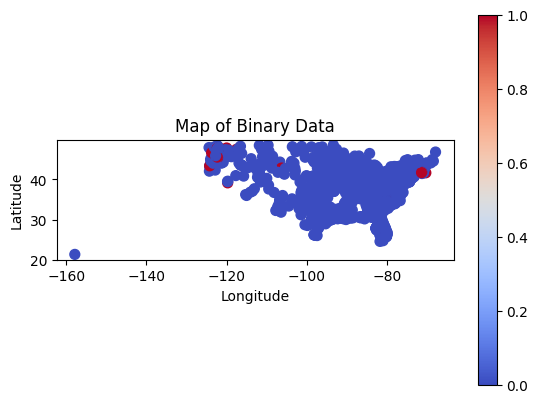

In [141]:
# Import necessary libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Sample data
df = result_df


# Convert DataFrame to GeoDataFrame
geometry = [Point(xy) for xy in zip(df['INTPTLON10'], df['INTPTLAT10'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Plot the data
fig, ax = plt.subplots()
gdf.plot(ax=ax, column='restrict_NA_permit', legend=True, cmap='coolwarm', markersize=50)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Map of Binary Data')
plt.show()

In [144]:
import pandas as pd
import folium

# Step 1: Load the data
# Assuming you have a CSV file with columns: 'longitude', 'latitude', 'binary_variable'
data = result_df

# Step 2: Create a base map centered on North America
m = folium.Map(location=[54.5260, -105.2551], zoom_start=4)

# Step 3: Add points to the map
for _, row in data.iterrows():
    color = 'green' if row['restrict_NA_permit'] == 1 else 'red'
    folium.CircleMarker(
        location=[row['INTPTLAT10'], row['INTPTLON10']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color
    ).add_to(m)

# Step 4: Save the map to an HTML file
m.save('map.html')